In [1]:
# Imports

# Data tools
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# scikit learn processing tools
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.model_selection import cross_val_score

# scitkit learn models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# from xgboost.sklearn.XGBModel import XGBClassifier
from xgboost import XGBClassifier

# scikit learn metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve

# Imbalanced Learn
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC
from imblearn.pipeline import make_pipeline
from imblearn.pipeline import Pipeline

# misc
from pprint import pprint
import pickle

In [2]:
# Set options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
%matplotlib inline

In [3]:
def print_scores(estimator, estimator_title, xtr, xtst, ytr, ytst):
    print('{} Score train:'.format(estimator_title), estimator.score(xtr, ytr))
    print('{} Score test:'.format(estimator_title), estimator.score(xtst, ytst))
    print(classification_report(ytst, estimator.predict(xtst)))

In [4]:
# Read in data set
tc = pd.read_csv('../data/processed/telecom_churn_cleaned.csv')
tc.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY,408,415,510,churn
0,128,0.0,1.0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,107,0.0,1.0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,137,0.0,0.0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,84,1.0,0.0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,75,1.0,0.0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [5]:
tc.describe()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY,408,415,510,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,0.096910,0.276628,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.015602,0.024002,0.016502,0.019202,0.010201,0.019802,0.022202,0.016202,0.018302,0.018902,0.016202,0.015902,0.013201,0.021902,0.017402,0.021302,0.021002,0.017702,0.015302,0.019502,0.021002,0.018602,0.021902,0.025203,0.018902,0.019502,0.020402,0.020402,0.018602,0.018302,0.016802,0.020402,0.018602,0.019802,0.024902,0.023402,0.018302,0.023402,0.013501,0.019502,0.018002,0.018002,0.015902,0.021602,0.021602,0.023102,0.021902,0.019802,0.023402,0.031803,0.023102,0.251425,0.496550,0.252025,0.144914
std,39.822106,0.295879,0.447398,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.123947,0.153079,0.127414,0.137255,0.100499,0.139340,0.147363,0.126269,0.134061,0.136199,0.126269,0.125114,0.114153,0.146386,0.130782,0.144411,0.143413,0.131885,0.122768,0.138302,0.143413,0.135134,0.146386,0.156763,0.136199,0.138302,0.141392,0.141392,0.135134,0.134061,0.128547,0.141392,0.135134,0.139340,0.155851,0.151200,0.134061,0.151200,0.115426,0.138302,0.132978,0.132978,0.125114,0.145402,0.145402,0.150251,0.146386,0.139340,0.151200,0.175502,0.150251,0.433897,0.500063,0.434241,0.352067
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50

In [6]:
# Drop 'CA' column from the dummy variables
tc = tc.drop('CA', axis=1)
tc.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,AK,AL,AR,AZ,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY,408,415,510,churn
0,128,0.0,1.0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,107,0.0,1.0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,137,0.0,0.0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,84,1.0,0.0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,75,1.0,0.0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [7]:
# Set up train/test split, create some extra copies to investigate scaling
y_orig = tc['churn'].values.copy()
X_orig = tc.drop('churn', axis=1).copy()
X, X_holdout, y, y_holdout = train_test_split(X_orig, y_orig, test_size=0.2,
                                                          random_state=42, shuffle=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                          random_state=42, shuffle=True)
X_train.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,AK,AL,AR,AZ,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY,408,415,510
42,34,0.0,0.0,0,124.8,82,21.22,282.2,98,23.99,311.5,78,14.02,10.0,4,2.70,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1166,72,0.0,0.0,0,118.2,106,20.09,167.2,136,14.21,214.2,106,9.64,12.2,3,3.29,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1895,86,0.0,1.0,21,197.9,99,33.64,165.6,100,14.08,208.0,120,9.36,10.1,9,2.73,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1083,82,1.0,0.0,0,208.8,101,35.50,213.7,87,18.16,175.1,86,7.88,12.4,6,3.35,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
129,131,0.0,1.0,36,214.2,115,36.41,161.7,117,13.74,264.7,102,11.91,9.5,4,2.57,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


### Steps to test for each model
1. StandardScaler fit/predict
2. Variations on hyperparameters
3. Balanced dataset fit predict (Random/Smote/Adyson)
4. Variations on hypterparameters with balanced data

In [8]:
# Testing LogisticRegression with GridSearchCV
steps = [('scaler', StandardScaler()),
         ('LR', LogisticRegression(solver='lbfgs', max_iter=1000))]

pipeline = Pipeline(steps)

parameters = {'LR__C' : [12000, 11000, 10000, 9000, 8000]}

cv = GridSearchCV(pipeline, param_grid=parameters, cv=5)
cv.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

# Compute and print metrics
print("Accuracy Train: {}".format(cv.score(X_test, y_test)))
print("Accuracy Test: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy Train: 0.8670411985018727
Accuracy Test: 0.8670411985018727
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       456
           1       0.62      0.23      0.34        78

    accuracy                           0.87       534
   macro avg       0.75      0.60      0.63       534
weighted avg       0.84      0.87      0.84       534

Tuned Model Parameters: {'LR__C': 10000}


#### Logistic Regression continually gets the best score at C=10000. Using C=10000 for further testing.  
#### Next step is try over sampling with Logistic Regression.

In [9]:
# Use Random Oversamping to see if score improves
steps = [('OR', RandomOverSampler(sampling_strategy='minority',random_state=42)),
         ('scaler', StandardScaler()),
         ('LR', LogisticRegression(solver='lbfgs', C=10000, max_iter=1000))]

lr_pipe = Pipeline(steps)

cross_val_score(lr_pipe, X_train, y_train, cv=5, n_jobs=-1)

array([0.76580796, 0.76112412, 0.75175644, 0.75117371, 0.75058824])

#### Random Oversampling decreased score. Trying ADASYN.

In [10]:
# Use Adasyn Oversamping to see if score improves
steps = [('ADASYN', ADASYN(sampling_strategy='minority', random_state=42)),
         ('scaler', StandardScaler()),
         ('LR', LogisticRegression(solver='lbfgs', C=10000, max_iter=1000))]

lr_pipe = Pipeline(steps)
cross_val_score(lr_pipe, X_train, y_train, cv=5, n_jobs=-1)

array([0.77283372, 0.74238876, 0.73067916, 0.72769953, 0.74352941])

#### ADASYN performed worse on average than Random Oversampling.  
#### Trying SMOTE.

In [11]:
# Use SMOTE Oversamping to see if score improves
steps = [('SMOTE', SMOTE(sampling_strategy='minority', random_state=42)),
         ('scaler', StandardScaler()),
         ('LR', LogisticRegression(solver='lbfgs', C=10000, max_iter=1000))]

lr_pipe = Pipeline(steps)
cross_val_score(lr_pipe, X_train, y_train, cv=5, n_jobs=-1)

array([0.79156909, 0.7587822 , 0.75175644, 0.75117371, 0.75764706])

#### SMOTE comes in between Random Oversampling and ADASYN.  
#### Trying SMOTENC

In [12]:
# This will create a list of indexes for feature (column) in the dataframe that is categorical.
X.AK.unique().shape[0]

categoricals = []
for idx, val in enumerate(X.columns):
    if X[val].unique().shape[0] == 2:
        categoricals.append(idx)
# categoricals

In [13]:
# Use SMOTENC Oversamping to see if score improves
steps = [('SMOTENC', SMOTENC(categoricals, sampling_strategy='minority', random_state=42)),
         ('scaler', StandardScaler()),
         ('LR', LogisticRegression(solver='lbfgs', C=10000, max_iter=1000))]

lr_pipe = Pipeline(steps)
cross_val_score(lr_pipe, X_train, y_train, cv=5, n_jobs=-1)

array([0.8618267 , 0.8618267 , 0.83138173, 0.85915493, 0.86352941])

### Performance of Logistic Regression is best without oversampling.  
### Start testing with Naive Bayes

In [14]:


steps = [('scaler', StandardScaler()),
         ('NB', GaussianNB())]

pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = pipeline.predict(X_test)

# Compute and print metrics
print("Accuracy Train: {}".format(pipeline.score(X_test, y_test)))
print("Accuracy Test: {}".format(pipeline.score(X_test, y_test)))
print(classification_report(y_test, y_pred))

Accuracy Train: 0.5955056179775281
Accuracy Test: 0.5955056179775281
              precision    recall  f1-score   support

           0       0.90      0.59      0.72       456
           1       0.20      0.60      0.30        78

    accuracy                           0.60       534
   macro avg       0.55      0.60      0.51       534
weighted avg       0.80      0.60      0.65       534



In [15]:
# Use Random Oversamping to see if score improves
steps = [('OR', RandomOverSampler(sampling_strategy='minority',random_state=42)),
         ('scaler', StandardScaler()),
         ('NB', GaussianNB())]

nb_pipe = Pipeline(steps)

cross_val_score(nb_pipe, X_train, y_train, cv=5, n_jobs=-1)

array([0.52459016, 0.56674473, 0.44730679, 0.33333333, 0.52235294])

In [16]:
def get_categoricals(frame):
    categoricals = []
    for idx, val in enumerate(frame.columns):
        if frame[val].nunique() == 2:
            categoricals.append(idx)
    return categoricals
# get_categoricals(X_train)

In [17]:

def get_discrete_cont(frame, labels=True):
    """Returns the colum names for columns that have an unique number of values > 50.
    The function assumes the columns are discrete or continuous. Either labels or the
    index of the column can be returned."""
    discrete_cont = []
    for idx, val in enumerate(frame.columns):
        if frame[val].nunique() > 50:
            if labels:
                discrete_cont.append(val)
            else:
                discrete_cont.append(idx)
    return discrete_cont
# get_discrete_cont(X_train, True)

In [18]:
def apply_cut(frame, cuts=25, labels=False):
    """Applies the pandas.qcut function to columns that are discrete or continuous in
    an attempted to bin them."""
    new_frame = frame.copy()
    discrete_cont = get_discrete_cont(frame, labels=True)
    for val in discrete_cont:
        new_frame[val] = pd.qcut(new_frame[val], cuts, labels=labels)
    return new_frame
# apply_qcut(X_train).head(3)

In [19]:
# Create a dataframe with binned data.
C = apply_cut(X)
C_train, C_test, d_train, d_test = train_test_split(C, y)
C.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,AK,AL,AR,AZ,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY,408,415,510
817,24,0.0,0.0,0,1,7,1,5,0,5,22,20,22,2,6,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1373,14,0.0,0.0,0,2,14,2,11,17,11,14,8,13,0,4,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
679,6,1.0,0.0,0,19,3,19,24,17,24,13,14,13,6,9,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
56,21,0.0,0.0,0,4,11,4,8,0,8,2,23,2,4,2,4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1993,8,0.0,0.0,0,18,9,18,22,2,22,14,17,14,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [20]:
# Test Naive Bayes using binned disrete & continuous values
steps = [('NB', MultinomialNB())]

pipeline = Pipeline(steps)
pipeline.fit(C_train, d_train)

# Predict the labels of the test set: y_pred
d_pred = pipeline.predict(C_test)

# Compute and print metrics
print("Accuracy Train: {}".format(pipeline.score(C_test, d_test)))
print("Accuracy Test: {}".format(pipeline.score(C_test, d_test)))
print(classification_report(d_test, d_pred))

Accuracy Train: 0.6071964017991005
Accuracy Test: 0.6071964017991005
              precision    recall  f1-score   support

           0       0.90      0.60      0.72       561
           1       0.23      0.64      0.34       106

    accuracy                           0.61       667
   macro avg       0.57      0.62      0.53       667
weighted avg       0.79      0.61      0.66       667



In [21]:
# Test Naive Bayes using binned disrete, and continuous values as well as oversampling
# with RandomOversampler
steps = [('OR', RandomOverSampler(sampling_strategy='minority',random_state=42)),
         ('NB', MultinomialNB())]

pipeline = Pipeline(steps)
pipeline.fit(C_train, d_train)

# Predict the labels of the test set: y_pred
d_pred = pipeline.predict(C_test)

# Compute and print metrics
print("Accuracy Train: {}".format(pipeline.score(C_test, d_test)))
print("Accuracy Test: {}".format(pipeline.score(C_test, d_test)))
print(classification_report(d_test, d_pred))

Accuracy Train: 0.5142428785607196
Accuracy Test: 0.5142428785607196
              precision    recall  f1-score   support

           0       0.92      0.47      0.62       561
           1       0.21      0.77      0.34       106

    accuracy                           0.51       667
   macro avg       0.57      0.62      0.48       667
weighted avg       0.80      0.51      0.57       667



In [22]:
# Test Naive Bayes using binned disrete, and continuous values as well as oversampling
# with ADASYN
steps = [('ADASYN', ADASYN(sampling_strategy='minority', random_state=42)),
         ('NB', MultinomialNB())]

pipeline = Pipeline(steps)
pipeline.fit(C_train, d_train)

# Predict the labels of the test set: y_pred
d_pred = pipeline.predict(C_test)

# Compute and print metrics
print("Accuracy Train: {}".format(pipeline.score(C_test, d_test)))
print("Accuracy Test: {}".format(pipeline.score(C_test, d_test)))
print(classification_report(d_test, d_pred))

Accuracy Train: 0.5112443778110944
Accuracy Test: 0.5112443778110944
              precision    recall  f1-score   support

           0       0.91      0.47      0.62       561
           1       0.21      0.75      0.33       106

    accuracy                           0.51       667
   macro avg       0.56      0.61      0.47       667
weighted avg       0.80      0.51      0.57       667



In [23]:
# Test Naive Bayes using binned disrete, and continuous values as well as oversampling
# with SMOTE
steps = [('SMOTE', SMOTE(sampling_strategy='minority', random_state=42)),
         ('NB', MultinomialNB())]

pipeline = Pipeline(steps)
pipeline.fit(C_train, d_train)

# Predict the labels of the test set: y_pred
d_pred = pipeline.predict(C_test)

# Compute and print metrics
print("Accuracy Train: {}".format(pipeline.score(C_test, d_test)))
print("Accuracy Test: {}".format(pipeline.score(C_test, d_test)))
print(classification_report(d_test, d_pred))

Accuracy Train: 0.527736131934033
Accuracy Test: 0.527736131934033
              precision    recall  f1-score   support

           0       0.91      0.49      0.63       561
           1       0.21      0.74      0.33       106

    accuracy                           0.53       667
   macro avg       0.56      0.61      0.48       667
weighted avg       0.80      0.53      0.59       667



In [24]:
# Test Naive Bayes using binned disrete, and continuous values as well as oversampling
# with SMOTENC
steps = [('SMOTENC', SMOTENC(categoricals[1:], sampling_strategy='minority', random_state=42)),
         ('NB', MultinomialNB())]

pipeline = Pipeline(steps)
pipeline.fit(C_train, d_train)

# Predict the labels of the test set: y_pred
d_pred = pipeline.predict(C_test)

# Compute and print metrics
print("Accuracy Train: {}".format(pipeline.score(C_test, d_test)))
print("Accuracy Test: {}".format(pipeline.score(C_test, d_test)))
print(classification_report(d_test, d_pred))

Accuracy Train: 0.5712143928035982
Accuracy Test: 0.5712143928035982
              precision    recall  f1-score   support

           0       0.90      0.55      0.69       561
           1       0.22      0.66      0.33       106

    accuracy                           0.57       667
   macro avg       0.56      0.61      0.51       667
weighted avg       0.79      0.57      0.63       667



### Support Vector Classifiers unbalanced and balanced

In [25]:
# Testing Support Vector Classifiers with GridSearchCV
steps = [('scaler', StandardScaler()),
         ('SVC', SVC())]

pipeline = Pipeline(steps)

parameters = [{'SVC__C' : [1, 10, 100, 1000],
              'SVC__kernel' : ['rbf'],
              'SVC__gamma': [1e-3, 1e-4]},
              {'SVC__C' : [1, 10, 100, 1000],
              'SVC__kernel' : ['linear']}]

cv = GridSearchCV(pipeline, param_grid=parameters, cv=5, n_jobs=-1)
cv.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

# Compute and print metrics
print("Accuracy Train: {}".format(cv.score(X_test, y_test)))
print("Accuracy Test: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy Train: 0.8838951310861424
Accuracy Test: 0.8838951310861424
              precision    recall  f1-score   support

           0       0.89      0.98      0.94       456
           1       0.74      0.32      0.45        78

    accuracy                           0.88       534
   macro avg       0.81      0.65      0.69       534
weighted avg       0.87      0.88      0.86       534

Tuned Model Parameters: {'SVC__C': 100, 'SVC__gamma': 0.001, 'SVC__kernel': 'rbf'}


### SVC with oversampled datasets

In [26]:
# SVC with RandomOverSampler
steps = [('OR', RandomOverSampler(sampling_strategy='minority',random_state=42)),
         ('scaler', StandardScaler()),
         ('SVC', SVC(C=100, gamma=0.001, kernel='rbf'))]

pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = pipeline.predict(X_test)

# Compute and print metrics
print("Accuracy Train: {}".format(pipeline.score(X_test, y_test)))
print("Accuracy Test: {}".format(pipeline.score(X_test, y_test)))
print(classification_report(y_test, y_pred))

Accuracy Train: 0.8426966292134831
Accuracy Test: 0.8426966292134831
              precision    recall  f1-score   support

           0       0.94      0.88      0.90       456
           1       0.47      0.65      0.55        78

    accuracy                           0.84       534
   macro avg       0.70      0.76      0.73       534
weighted avg       0.87      0.84      0.85       534



In [27]:
# SVC with SMOTE
steps = [('SMOTE', SMOTE(sampling_strategy='minority', random_state=42)),
         ('scaler', StandardScaler()),
         ('SVC', SVC(C=100, gamma=0.001, kernel='rbf'))]

pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = pipeline.predict(X_test)

# Compute and print metrics
print("Accuracy Train: {}".format(pipeline.score(X_test, y_test)))
print("Accuracy Test: {}".format(pipeline.score(X_test, y_test)))
print(classification_report(y_test, y_pred))

Accuracy Train: 0.8820224719101124
Accuracy Test: 0.8820224719101124
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       456
           1       0.61      0.53      0.57        78

    accuracy                           0.88       534
   macro avg       0.77      0.73      0.75       534
weighted avg       0.88      0.88      0.88       534



In [28]:
# SVC with SMOTENC
categoricals = get_categoricals(X_train)

steps = [('SMOTENC', SMOTENC(categoricals, sampling_strategy='minority', random_state=42)),
         ('scaler', StandardScaler()),
         ('SVC', SVC(C=100, gamma=0.001, kernel='rbf'))]

pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = pipeline.predict(X_test)

# Compute and print metrics
print("Accuracy Train: {}".format(pipeline.score(X_test, y_test)))
print("Accuracy Test: {}".format(pipeline.score(X_test, y_test)))
print(classification_report(y_test, y_pred))

Accuracy Train: 0.8726591760299626
Accuracy Test: 0.8726591760299626
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       456
           1       0.64      0.29      0.40        78

    accuracy                           0.87       534
   macro avg       0.76      0.63      0.67       534
weighted avg       0.85      0.87      0.85       534



### KNN Classifier

In [29]:
# KNN GridSearchCV
steps = [('scaler', StandardScaler()),
         ('KNN', KNeighborsClassifier())]

pipeline = Pipeline(steps)

parameters = {'KNN__n_neighbors' : [10, 9, 8, 7, 6, 5, 4, 3, 2]}

cv = GridSearchCV(pipeline, param_grid=parameters, cv=5)
cv.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

# Compute and print metrics
print("Accuracy Train: {}".format(cv.score(X_test, y_test)))
print("Accuracy Test: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy Train: 0.8558052434456929
Accuracy Test: 0.8558052434456929
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       456
           1       0.67      0.03      0.05        78

    accuracy                           0.86       534
   macro avg       0.76      0.51      0.49       534
weighted avg       0.83      0.86      0.79       534

Tuned Model Parameters: {'KNN__n_neighbors': 6}


### Random Forest Classifier

In [30]:
# Random Forest GridSearchCV
steps = [('scaler', StandardScaler()),
         ('RF', RandomForestClassifier(random_state=42))]

pipeline = Pipeline(steps)

parameters = {'RF__n_estimators' : [300, 325, 350, 375, 400]}

cv = GridSearchCV(pipeline, param_grid=parameters, cv=5)
cv.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

# Compute and print metrics
print("Accuracy Train: {}".format(cv.score(X_test, y_test)))
print("Accuracy Test: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy Train: 0.9269662921348315
Accuracy Test: 0.9269662921348315
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       456
           1       0.93      0.54      0.68        78

    accuracy                           0.93       534
   macro avg       0.93      0.77      0.82       534
weighted avg       0.93      0.93      0.92       534

Tuned Model Parameters: {'RF__n_estimators': 400}


In [31]:
# Standard scaled random forest
steps = [('scaler', StandardScaler()),
         ('RF', RandomForestClassifier(n_estimators=300, random_state=42))]

pipeline = Pipeline(steps)
cv = pipeline
cv.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

# Compute and print metrics
print("Accuracy Train: {}".format(cv.score(X_test, y_test)))
print("Accuracy Test: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))

Accuracy Train: 0.9250936329588015
Accuracy Test: 0.9250936329588015
              precision    recall  f1-score   support

           0       0.92      0.99      0.96       456
           1       0.93      0.53      0.67        78

    accuracy                           0.93       534
   macro avg       0.93      0.76      0.81       534
weighted avg       0.93      0.93      0.92       534



In [32]:
# Random Forest with OverSampling using RandomOverSampler
steps = [('OR', RandomOverSampler(sampling_strategy='minority',random_state=42)),
         ('scaler', StandardScaler()),
         ('RF', RandomForestClassifier(n_estimators=400, random_state=42))]

pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = pipeline.predict(X_test)

# Compute and print metrics
print("Accuracy Train: {}".format(pipeline.score(X_test, y_test)))
print("Accuracy Test: {}".format(pipeline.score(X_test, y_test)))
print(classification_report(y_test, y_pred))

Accuracy Train: 0.9419475655430711
Accuracy Test: 0.9419475655430711
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       456
           1       0.91      0.67      0.77        78

    accuracy                           0.94       534
   macro avg       0.93      0.83      0.87       534
weighted avg       0.94      0.94      0.94       534



ROC AUC score =  0.9043241115609536


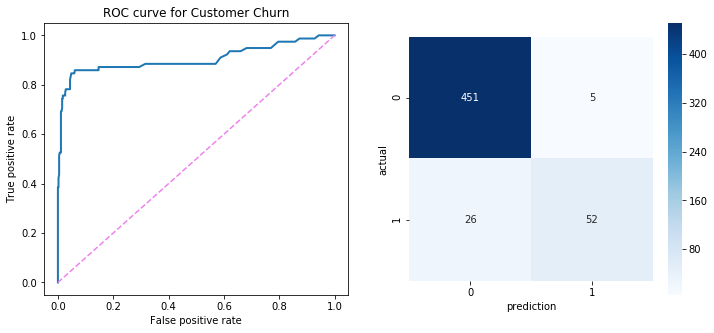

In [33]:
# Plot results
plt.figure(figsize=(12, 5))
fpr, tpr, thresholds = roc_curve(y_test, pipeline.predict_proba(X_test)[:,1])
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for Customer Churn');
print("ROC AUC score = ", roc_auc_score(y_test, pipeline.predict_proba(X_test)[:,1]))

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, pipeline.predict(X_test)), cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['0', '1'],
           yticklabels=['0', '1']);
plt.xlabel('prediction')
plt.ylabel('actual');

In [34]:
# Random Forest with OverSampling using ADASYN
steps = [('ADASYN', ADASYN(sampling_strategy='minority', random_state=42)),
         ('scaler', StandardScaler()),
         ('RF', RandomForestClassifier(n_estimators=400, random_state=42))]

pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = pipeline.predict(X_test)

# Compute and print metrics
print("Accuracy Train: {}".format(pipeline.score(X_test, y_test)))
print("Accuracy Test: {}".format(pipeline.score(X_test, y_test)))
print(classification_report(y_test, y_pred))

Accuracy Train: 0.9344569288389513
Accuracy Test: 0.9344569288389513
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       456
           1       0.80      0.73      0.77        78

    accuracy                           0.93       534
   macro avg       0.88      0.85      0.86       534
weighted avg       0.93      0.93      0.93       534



ROC AUC score =  0.9124072199730094


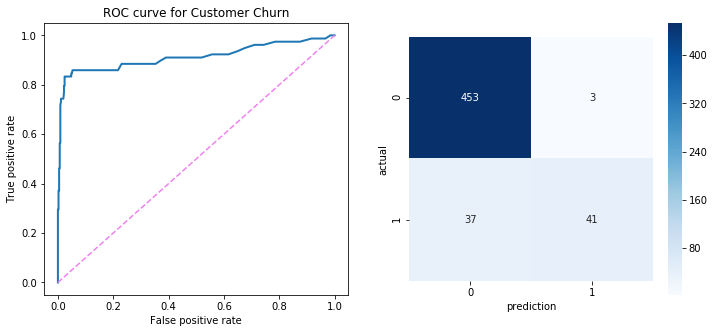

In [35]:
# Plot results
plt.figure(figsize=(12, 5))
fpr, tpr, thresholds = roc_curve(y_test, cv.predict_proba(X_test)[:,1])
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for Customer Churn');
print("ROC AUC score = ", roc_auc_score(y_test, cv.predict_proba(X_test)[:,1]))

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, cv.predict(X_test)), cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['0', '1'],
           yticklabels=['0', '1']);
plt.xlabel('prediction')
plt.ylabel('actual');

In [36]:
# Random Forest with OverSampling using SMOTE
steps = [('SMOTE', SMOTE(sampling_strategy='minority', random_state=42)),
         ('scaler', StandardScaler()),
         ('RF', RandomForestClassifier(n_estimators=400, random_state=42))]

pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = pipeline.predict(X_test)

# Compute and print metrics
print("Accuracy Train: {}".format(pipeline.score(X_test, y_test)))
print("Accuracy Test: {}".format(pipeline.score(X_test, y_test)))
print(classification_report(y_test, y_pred))

Accuracy Train: 0.9344569288389513
Accuracy Test: 0.9344569288389513
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       456
           1       0.84      0.68      0.75        78

    accuracy                           0.93       534
   macro avg       0.89      0.83      0.86       534
weighted avg       0.93      0.93      0.93       534



In [37]:
# Random Forest with OverSampling using SMOTENC
categoricals = get_categoricals(X_train)

steps = [('SMOTENC', SMOTENC(categoricals, sampling_strategy='minority', random_state=42)),
         ('scaler', StandardScaler()),
         ('RF', RandomForestClassifier(n_estimators=400, random_state=42))]

pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = pipeline.predict(X_test)

# Compute and print metrics
print("Accuracy Train: {}".format(pipeline.score(X_test, y_test)))
print("Accuracy Test: {}".format(pipeline.score(X_test, y_test)))
print(classification_report(y_test, y_pred))

Accuracy Train: 0.9176029962546817
Accuracy Test: 0.9176029962546817
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       456
           1       0.77      0.62      0.69        78

    accuracy                           0.92       534
   macro avg       0.86      0.79      0.82       534
weighted avg       0.91      0.92      0.91       534



In [38]:
xg = XGBClassifier(n_estimators=250, max_depth=6)#, random_state=42)
xg.fit(X_train, y_train)
# y_pred = xg.predict(X_test)
# y_pred = xg.predict_proba(X_test)[:,0]<0.8
y_pred = xg.predict_proba(X_test)[:,1]>0.05
# y_pred = xg.predict_proba(X_holdout)[:,0]<0.99
# y_pred = xg.predict(X_holdout)
y_pred_proba = xg.predict_proba(X_test)

# Compute and print metrics
print("Accuracy Train: {}".format(xg.score(X_train, y_train)))
print("Accuracy Test: {}".format(xg.score(X_test, y_test)))
print(classification_report(y_test, y_pred))

Accuracy Train: 1.0
Accuracy Test: 0.9644194756554307
              precision    recall  f1-score   support

           0       0.97      0.92      0.94       456
           1       0.64      0.85      0.73        78

    accuracy                           0.91       534
   macro avg       0.81      0.88      0.84       534
weighted avg       0.92      0.91      0.91       534



ROC AUC score =  0.9070793972109762


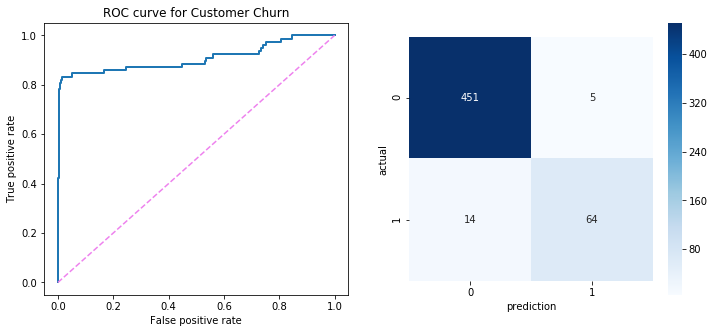

In [39]:
plt.figure(figsize=(12, 5))
fpr, tpr, thresholds = roc_curve(y_test, xg.predict_proba(X_test)[:,1])
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for Customer Churn');
print("ROC AUC score = ", roc_auc_score(y_test, xg.predict_proba(X_test)[:,1]))

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, xg.predict(X_test)), cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['0', '1'],
           yticklabels=['0', '1']);
plt.xlabel('prediction')
plt.ylabel('actual');

In [40]:
# XGBoost GridSearchCV
steps = [('XG', XGBClassifier(random_state=42))]

pipeline = Pipeline(steps)

parameters = {'XG__n_estimators' : [200, 225, 250, 275],
              'XG__max_depth' : [7, 6, 5]}

cv = GridSearchCV(pipeline, param_grid=parameters, cv=5)
cv.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

# Compute and print metrics
print("Accuracy Train: {}".format(cv.score(X_test, y_test)))
print("Accuracy Test: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy Train: 0.9644194756554307
Accuracy Test: 0.9644194756554307
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       456
           1       0.93      0.82      0.87        78

    accuracy                           0.96       534
   macro avg       0.95      0.90      0.93       534
weighted avg       0.96      0.96      0.96       534

Tuned Model Parameters: {'XG__max_depth': 6, 'XG__n_estimators': 250}


### Best Results are XGBoost, 250 learners, max depth of 6  
Accuracy Train: 0.9644194756554307  
Accuracy Test: 0.9644194756554307  
              precision    recall  f1-score   support  

           0       0.97      0.99      0.98       456  
           1       0.93      0.82      0.87        78  

    accuracy                           0.96       534  
   macro avg       0.95      0.90      0.93       534  
weighted avg       0.96      0.96      0.96       534  
  
Tuned Model Parameters: {'XG__max_depth': 6, 'XG__n_estimators': 250}  

ROC AUC score =  0.9070793972109762


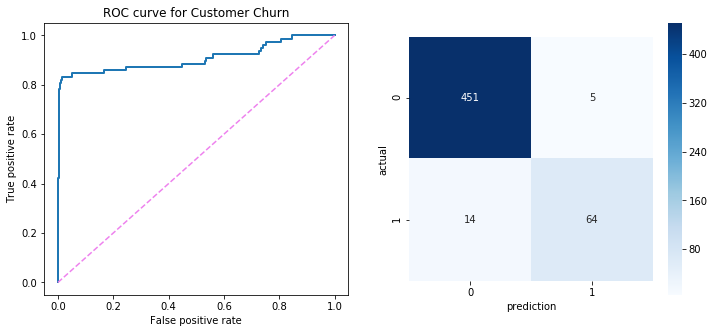

In [41]:
# Plot results of best fit
plt.figure(figsize=(12, 5))
fpr, tpr, thresholds = roc_curve(y_test, cv.predict_proba(X_test)[:,1])
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for Customer Churn');
print("ROC AUC score = ", roc_auc_score(y_test, cv.predict_proba(X_test)[:,1]))

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, cv.predict(X_test)), cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['0', '1'],
           yticklabels=['0', '1']);
plt.xlabel('prediction')
plt.ylabel('actual');

In [42]:
xg = XGBClassifier(random_state=42, n_estimators=250, max_depth=6)
xg.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=250, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [43]:
xg.feature_importances_

array([0.02069131, 0.0977449 , 0.13723789, 0.02202822, 0.07283982,
       0.01964732, 0.        , 0.04700342, 0.02066724, 0.        ,
       0.0273985 , 0.02248895, 0.        , 0.04370305, 0.08167168,
       0.        , 0.11381047, 0.        , 0.        , 0.        ,
       0.        , 0.01013246, 0.        , 0.02778807, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.01309831,
       0.00763046, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.01152414, 0.02289235, 0.        , 0.01422061,
       0.        , 0.        , 0.02404474, 0.        , 0.        ,
       0.        , 0.02478049, 0.        , 0.00908154, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.01991938,
       0.        , 0.        , 0.01610776, 0.        , 0.01809745,
       0.        , 0.        , 0.01731904, 0.01820232, 0.01822804],
      dtype=float32)

In [44]:
def get_feature_names(dataset, importances):
    important_features = []
    feature_values = []
    for idx, val in enumerate(importances):
        if val > 0.01:
            important_features.append(True)
        else:
            important_features.append(False)
        feature_values.append(val)
    important_features = np.array(important_features)
    feature_names = np.array(dataset.columns)[important_features]
    feature_values = np.array(feature_values)[important_features]
    value_sort = np.argsort(feature_values)
    
    return (feature_names[value_sort], feature_values[value_sort])
        

In [45]:
a, b = get_feature_names(X_train, xg.feature_importances_)


In [46]:
(a[::-1], b[::-1])

(array(['voice mail plan', 'customer service calls', 'international plan',
        'total intl calls', 'total day minutes', 'total eve minutes',
        'total intl minutes', 'DC', 'total night minutes', 'OH', 'NJ',
        'MT', 'total night calls', 'number vmail messages',
        'account length', 'total eve calls', 'TX', 'total day calls',
        '510', '415', 'WI', '408', 'VT', 'ND', 'LA', 'MS', 'CO'],
       dtype=object),
 array([0.13723789, 0.11381047, 0.0977449 , 0.08167168, 0.07283982,
        0.04700342, 0.04370305, 0.02778807, 0.0273985 , 0.02478049,
        0.02404474, 0.02289235, 0.02248895, 0.02202822, 0.02069131,
        0.02066724, 0.01991938, 0.01964732, 0.01822804, 0.01820232,
        0.01809745, 0.01731904, 0.01610776, 0.01422061, 0.01309831,
        0.01152414, 0.01013246], dtype=float32))